In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/faulty-steel-plates/faults.csv')

In [3]:
df.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              1941 non-null   int64  
 1   X_Maximum              1941 non-null   int64  
 2   Y_Minimum              1941 non-null   int64  
 3   Y_Maximum              1941 non-null   int64  
 4   Pixels_Areas           1941 non-null   int64  
 5   X_Perimeter            1941 non-null   int64  
 6   Y_Perimeter            1941 non-null   int64  
 7   Sum_of_Luminosity      1941 non-null   int64  
 8   Minimum_of_Luminosity  1941 non-null   int64  
 9   Maximum_of_Luminosity  1941 non-null   int64  
 10  Length_of_Conveyer     1941 non-null   int64  
 11  TypeOfSteel_A300       1941 non-null   int64  
 12  TypeOfSteel_A400       1941 non-null   int64  
 13  Steel_Plate_Thickness  1941 non-null   int64  
 14  Edges_Index            1941 non-null   float64
 15  Empt

In the above columns , it can be found that all the Dtypes of the columns are int64 or float64 meaning there are no NULL values in any of the columns. Anyhow lets check it with the heatmap.

In [5]:
df.isnull().sum()

X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
Pastry                   0
Z_Scratch                0
K_Scatch                 0
Stains                   0
Dirtiness                0
Bumps                    0
Other_Faults             0
dtype: int64

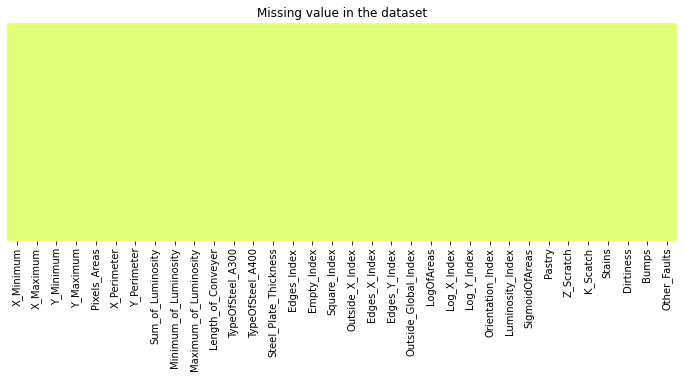

In [6]:
#check missing values
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(),cbar=False,cmap='Wistia',yticklabels=False)
plt.title('Missing value in the dataset');

The last seven columns are the defects.

In [7]:
df.iloc[:,27:34]

,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
1936,0,0,0,0,0,0,1
1937,0,0,0,0,0,0,1
1938,0,0,0,0,0,0,1
1939,0,0,0,0,0,0,1


First 27 columns are the features of the dataset.

(1941, 27)


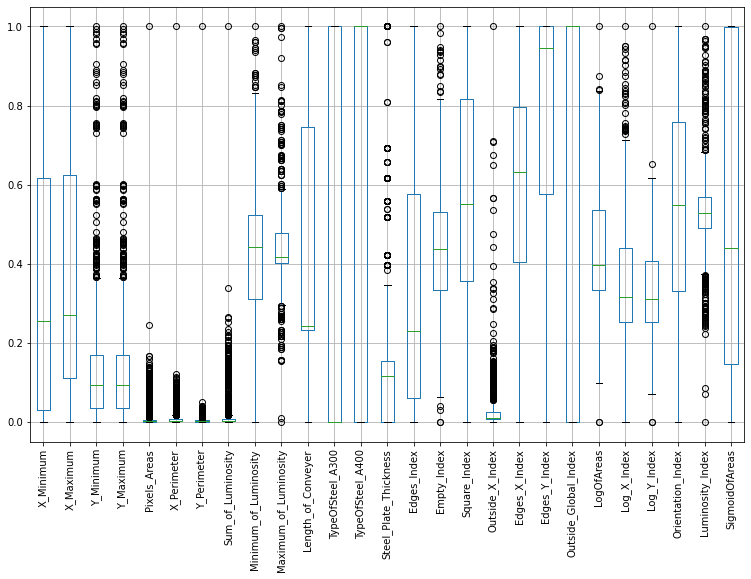

In [8]:
y=df.iloc[:,27:34];
X=df.iloc[:,0:27];
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range =(0,1))

X_std = pd.DataFrame(sc.fit_transform(X), columns = X.columns)
print(X_std.shape)
X_std.boxplot(figsize = (12.8,8), rot = 90)
plt.boxplot
plt.show()

Before we dig in further. We will try to put all the seven columns of the label in to one 'Target' column.

In [9]:
targets = df.iloc[:, 27:]
df.drop(targets.columns, axis=1, inplace=True) # this will drop the all the defects column
df['Target'] = targets.idxmax(1) #this will add a 'Target' column to our dataset describing which record has a particular defect.
df.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Target
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,Pastry
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,Pastry
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,Pastry
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,Pastry
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,Pastry


Let us look at the classification of each of these defects.

<AxesSubplot:ylabel='Target'>

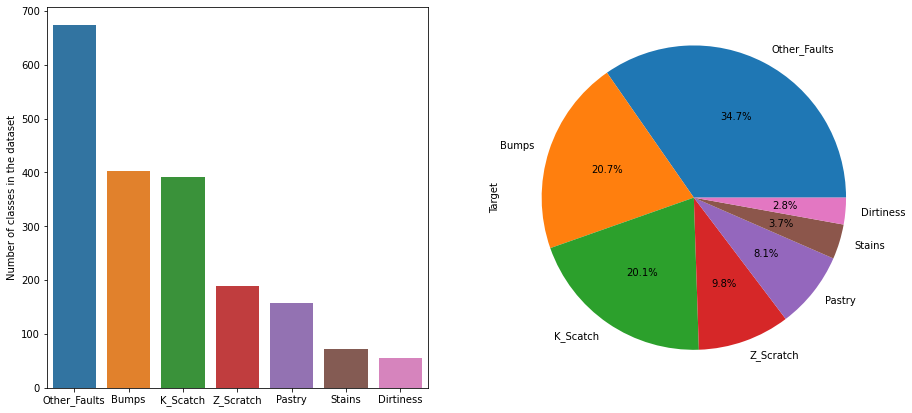

In [10]:
target_counts= df['Target'].value_counts()

fig, ax = plt.subplots(1, 2, figsize=(15,7))
target_counts_barplot = sns.barplot(x = target_counts.index,y = target_counts.values, ax = ax[0])
target_counts_barplot.set_ylabel('Number of classes in the dataset')

colors = ['#8d99ae','#ffe066', '#f77f00','#348aa7','#bce784','#ffcc99',  '#f25f5c']
target_counts.plot.pie(autopct="%1.1f%%", ax=ax[1])

Lets check if there is any correlation between the features.

<AxesSubplot:>

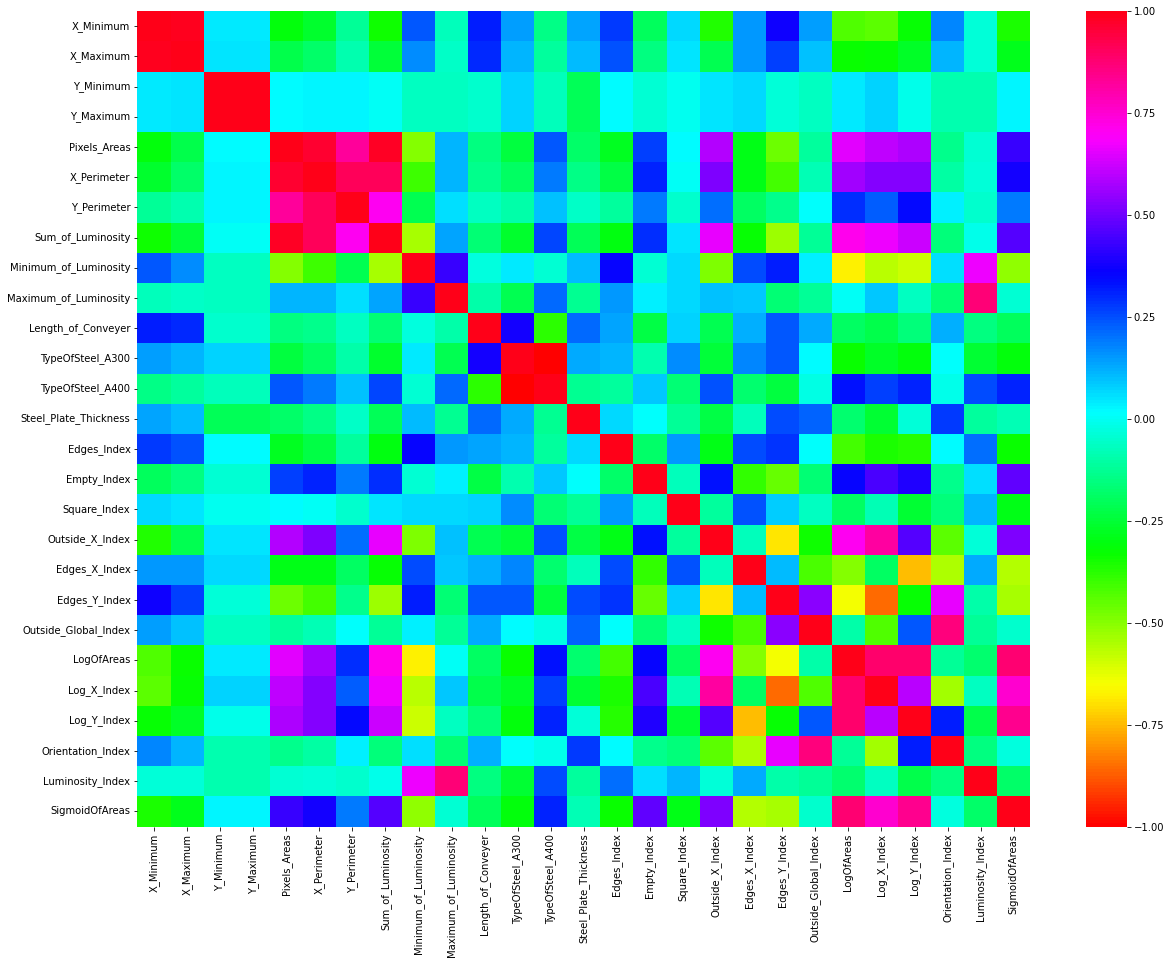

In [11]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), cmap='hsv')

Lets convert the categorical values of Target column in to numerical values.

In [12]:
df['Target'] = pd.Categorical(df['Target'])
df['Target_Code'] = df.Target.cat.codes

In [13]:
df.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Target,Target_Code
0,42,50,270900,270944,267,17,44,24220,76,108,...,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,Pastry,4
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,Pastry,4
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,Pastry,4
3,853,860,369370,369415,176,13,45,18996,99,126,...,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,Pastry,4
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,Pastry,4


In [14]:
y=df.iloc[:,27];
y.head()

0    Pastry
1    Pastry
2    Pastry
3    Pastry
4    Pastry
Name: Target, dtype: category
Categories (7, object): ['Bumps', 'Dirtiness', 'K_Scatch', 'Other_Faults', 'Pastry', 'Stains', 'Z_Scratch']

<AxesSubplot:xlabel='Target', ylabel='X_Maximum'>

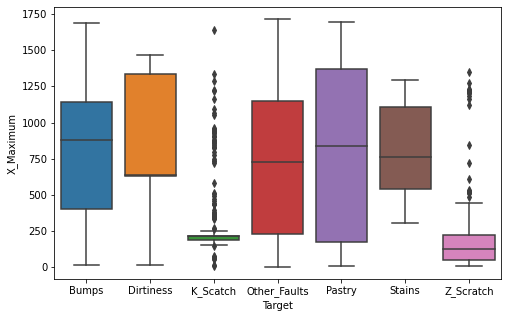

In [15]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Target', y='X_Maximum', data=df)

In [16]:
df.corr()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Target_Code
X_Minimum,1.000000,0.988314,0.041821,0.041807,-0.307322,-0.258937,-0.118757,-0.339045,0.237637,-0.075554,...,0.154778,0.367907,0.147282,-0.428553,-0.437944,-0.326851,0.178585,-0.031578,-0.355251,-0.155906
X_Maximum,0.988314,1.000000,0.052147,0.052135,-0.225399,-0.186326,-0.090138,-0.247052,0.168649,-0.062392,...,0.149259,0.271915,0.099253,-0.332169,-0.324012,-0.265990,0.115019,-0.038996,-0.286736,-0.179694
Y_Minimum,0.041821,0.052147,1.000000,1.000000,0.017670,0.023843,0.024150,0.007362,-0.065703,-0.067785,...,0.066085,-0.036543,-0.062911,0.044952,0.070406,-0.008442,-0.086497,-0.090654,0.025257,-0.139695
Y_Maximum,0.041807,0.052135,1.000000,1.000000,0.017840,0.024038,0.024380,0.007499,-0.065733,-0.067776,...,0.066051,-0.036549,-0.062901,0.044994,0.070432,-0.008382,-0.086480,-0.090666,0.025284,-0.139694
Pixels_Areas,-0.307322,-0.225399,0.017670,0.017840,1.000000,0.966644,0.827199,0.978952,-0.497204,0.110063,...,-0.294673,-0.463571,-0.109655,0.650234,0.603072,0.578342,-0.137604,-0.043449,0.422947,-0.076184
X_Perimeter,-0.258937,-0.186326,0.023843,0.024038,0.966644,1.000000,0.912436,0.912956,-0.400427,0.111363,...,-0.293039,-0.412100,-0.079106,0.563036,0.524716,0.523472,-0.101731,-0.032617,0.380605,-0.056565
Y_Perimeter,-0.118757,-0.090138,0.024150,0.024380,0.827199,0.912436,1.000000,0.704876,-0.213758,0.061809,...,-0.195162,-0.136723,0.013438,0.294040,0.228485,0.344378,0.031381,-0.047778,0.191772,-0.018765
Sum_of_Luminosity,-0.339045,-0.247052,0.007362,0.007499,0.978952,0.912956,0.704876,1.000000,-0.540566,0.136515,...,-0.327728,-0.529745,-0.121090,0.712128,0.667736,0.618795,-0.158483,-0.014067,0.464248,-0.086180
Minimum_of_Luminosity,0.237637,0.168649,-0.065703,-0.065733,-0.497204,-0.400427,-0.213758,-0.540566,1.000000,0.429605,...,0.252256,0.316610,0.035462,-0.678762,-0.567655,-0.588208,0.057123,0.669534,-0.514797,0.086158
Maximum_of_Luminosity,-0.075554,-0.062392,-0.067785,-0.067776,0.110063,0.111363,0.061809,0.136515,0.429605,1.000000,...,0.093522,-0.167441,-0.124039,0.007672,0.092823,-0.069522,-0.169747,0.870160,-0.039651,-0.099244


In [17]:
df.describe()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Target_Code
count,1941.000000,1941.000000,1.941000e+03,1.941000e+03,1941.000000,1941.000000,1941.000000,1.941000e+03,1941.000000,1941.000000,...,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
mean,571.136012,617.964451,1.650685e+06,1.650739e+06,1893.878413,111.855229,82.965997,2.063121e+05,84.548686,130.193715,...,0.610529,0.813472,0.575734,2.492388,1.335686,1.403271,0.083288,-0.131305,0.585420,2.569809
std,520.690671,497.627410,1.774578e+06,1.774590e+06,5168.459560,301.209187,426.482879,5.122936e+05,32.134276,18.690992,...,0.243277,0.234274,0.482352,0.788930,0.481612,0.454345,0.500868,0.148767,0.339452,1.762407
min,0.000000,4.000000,6.712000e+03,6.724000e+03,2.000000,2.000000,1.000000,2.500000e+02,0.000000,37.000000,...,0.014400,0.048400,0.000000,0.301000,0.301000,0.000000,-0.991000,-0.998900,0.119000,0.000000
25%,51.000000,192.000000,4.712530e+05,4.712810e+05,84.000000,15.000000,13.000000,9.522000e+03,63.000000,124.000000,...,0.411800,0.596800,0.000000,1.924300,1.000000,1.079200,-0.333300,-0.195000,0.248200,2.000000
50%,435.000000,467.000000,1.204128e+06,1.204136e+06,174.000000,26.000000,25.000000,1.920200e+04,90.000000,127.000000,...,0.636400,0.947400,1.000000,2.240600,1.176100,1.322200,0.095200,-0.133000,0.506300,3.000000
75%,1053.000000,1072.000000,2.183073e+06,2.183084e+06,822.000000,84.000000,83.000000,8.301100e+04,106.000000,140.000000,...,0.800000,1.000000,1.000000,2.914900,1.518500,1.732400,0.511600,-0.066600,0.999800,3.000000
max,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,10449.000000,18152.000000,1.159141e+07,203.000000,253.000000,...,1.000000,1.000000,1.000000,5.183700,3.074100,4.258700,0.991700,0.642100,1.000000,6.000000


Now lets remove the outliers. There are many ways to remove the outliers. Few of them are as follows:
1. Using the Z-scores, removing the ones which has z-score of less than -3 and greater than 3, if the  data distribution follows the normal distribution.
1. Using the quartile ranges, if the value falls below the 1.5 times of IQR (inter quartile range) from Q1 (25 percentile) or above the 1.5 times of IQR from Q3 (75 percentile) it can be done if the data is skewed. 
1. The other method is by using the clusters and providing the minimum distance and minimum samples to be in the cluster.

But before we remove any data, we must ensure we dont remove the data which may carry important information. As can be seen if we apply the 1st and 2nd method we will be removing all the values for K_scratch defect, which may undertrain our model. So we will go with 3rd method


We will use the DBSCAN method. Before we dig in, we will try to remove the 10% outliers and we need to identify the distance to remove those outleirs. A small code will work for us to identify the distance and we fix the number of samples to be 7.

In [18]:
from sklearn.cluster import DBSCAN
from collections import Counter
eps_r = 0.1
while eps_r < 10:
    dbscan_model = DBSCAN(eps=eps_r, min_samples=7).fit(X_std) 
    
    if Counter(dbscan_model.labels_)[-1] < 0.1*len(X_std):
        print('The neighbourhood distance considered for removal of less than 10% outliers is: {}'.format(eps_r))
        break
        
    eps_r = eps_r + 0.1

The neighbourhood distance considered for removal of less than 10% outliers is: 0.6


We will use this distance of 0.6 on our data and minimum samples of 7 in each cluster to remove less than 105 outliers.

In [19]:
dbscan_model = DBSCAN(eps=eps_r, min_samples=7).fit(X_std)

Check the shape of outliers. It has to be less than 10% of 1941 (i.e., less than 194)

In [20]:
outliers = X_std[dbscan_model.labels_ == -1]
outliers.shape

(144, 27)

lets drop these 144 records.

In [21]:
X_std.drop(outliers.index, axis=0, inplace=True)
y.drop(outliers.index, axis=0, inplace=True)

In [22]:
X_std.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,0.024633,0.026916,0.020352,0.020354,0.001736,0.001436,0.002369,0.002068,0.374384,0.328704,...,0.003660,0.462865,1.000000,1.0,0.435312,0.217122,0.385916,0.912493,0.431200,0.525766
1,0.378299,0.378584,0.195006,0.195007,0.000694,0.000766,0.001598,0.000962,0.413793,0.398148,...,0.002402,0.594156,0.965006,1.0,0.354804,0.172082,0.343391,0.899834,0.501706,0.203632
2,0.486217,0.486249,0.119190,0.119190,0.000452,0.000574,0.000992,0.000666,0.487685,0.407407,...,0.002516,0.746347,0.944725,1.0,0.317509,0.172082,0.294761,0.836082,0.533882,0.108967
3,0.500293,0.500878,0.027938,0.027940,0.001140,0.001053,0.002424,0.001617,0.487685,0.412037,...,0.004231,0.531757,1.000000,1.0,0.398243,0.196206,0.388194,0.925707,0.513163,0.456527
4,0.756012,0.761849,0.037853,0.037872,0.015768,0.005552,0.014269,0.021282,0.182266,0.412037,...,0.012694,0.272829,0.987915,1.0,0.630962,0.335184,0.565877,0.970797,0.487325,1.000000


Now lets check the distribution of data after removing the outliers. Still the data goes beyond the IQR ranges.If we try to remove those we will be missing the important information needed for the model training.

NB: Remember the figure below is for new data, here the median and mean will be changed and not the same as before with all the entries.

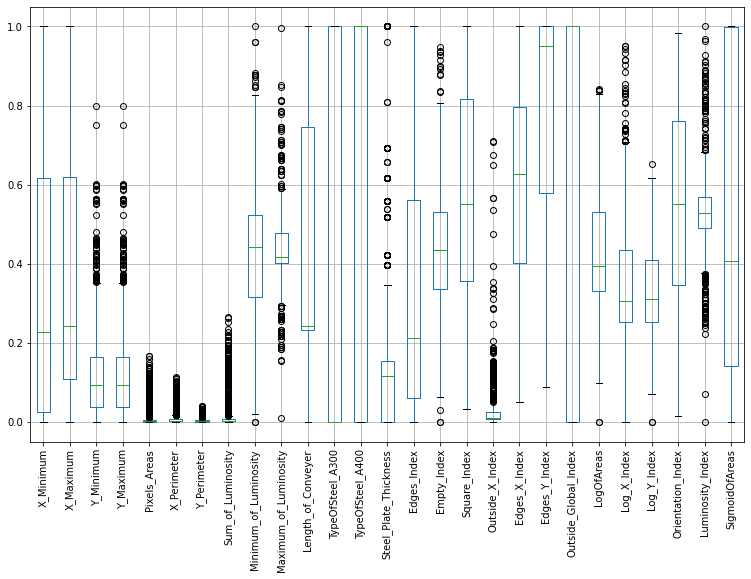

In [23]:
X_std.boxplot(figsize = (12.8,8), rot = 90)
plt.boxplot
plt.show()

In [24]:
X_std.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1797 entries, 0 to 1940
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              1797 non-null   float64
 1   X_Maximum              1797 non-null   float64
 2   Y_Minimum              1797 non-null   float64
 3   Y_Maximum              1797 non-null   float64
 4   Pixels_Areas           1797 non-null   float64
 5   X_Perimeter            1797 non-null   float64
 6   Y_Perimeter            1797 non-null   float64
 7   Sum_of_Luminosity      1797 non-null   float64
 8   Minimum_of_Luminosity  1797 non-null   float64
 9   Maximum_of_Luminosity  1797 non-null   float64
 10  Length_of_Conveyer     1797 non-null   float64
 11  TypeOfSteel_A300       1797 non-null   float64
 12  TypeOfSteel_A400       1797 non-null   float64
 13  Steel_Plate_Thickness  1797 non-null   float64
 14  Edges_Index            1797 non-null   float64
 15  Empt

In [25]:
y

0             Pastry
1             Pastry
2             Pastry
3             Pastry
4             Pastry
            ...     
1936    Other_Faults
1937    Other_Faults
1938    Other_Faults
1939    Other_Faults
1940    Other_Faults
Name: Target, Length: 1797, dtype: category
Categories (7, object): ['Bumps', 'Dirtiness', 'K_Scatch', 'Other_Faults', 'Pastry', 'Stains', 'Z_Scratch']

In [26]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X_std, y, train_size = 0.90, random_state = 15)

In [27]:
y

0             Pastry
1             Pastry
2             Pastry
3             Pastry
4             Pastry
            ...     
1936    Other_Faults
1937    Other_Faults
1938    Other_Faults
1939    Other_Faults
1940    Other_Faults
Name: Target, Length: 1797, dtype: category
Categories (7, object): ['Bumps', 'Dirtiness', 'K_Scatch', 'Other_Faults', 'Pastry', 'Stains', 'Z_Scratch']

We will be developing the prediction model with various algorithms viz., Logistic Regression, Decision Tree Classifier and Support Vector machine and pick the one with better accuracy.

In [28]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression(max_iter=1000)
LogReg.fit(X_train, y_train)

y_pred_LogReg = LogReg.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred_LogReg))
print(confusion_matrix(y_test, y_pred_LogReg))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred_LogReg,y_test))

              precision    recall  f1-score   support

       Bumps       0.62      0.59      0.60        44
   Dirtiness       1.00      1.00      1.00         3
    K_Scatch       0.98      1.00      0.99        40
Other_Faults       0.62      0.77      0.69        47
      Pastry       0.71      0.42      0.53        12
      Stains       1.00      0.77      0.87        13
   Z_Scratch       0.74      0.67      0.70        21

    accuracy                           0.74       180
   macro avg       0.81      0.74      0.77       180
weighted avg       0.75      0.74      0.74       180

[[26  0  0 14  1  0  3]
 [ 0  3  0  0  0  0  0]
 [ 0  0 40  0  0  0  0]
 [ 9  0  0 36  1  0  1]
 [ 2  0  0  4  5  0  1]
 [ 1  0  0  2  0 10  0]
 [ 4  0  1  2  0  0 14]]
accuracy is 0.7444444444444445


[[26  0  0 14  1  0  3]
 [ 0  3  0  0  0  0  0]
 [ 0  0 40  0  0  0  0]
 [ 9  0  0 36  1  0  1]
 [ 2  0  0  4  5  0  1]
 [ 1  0  0  2  0 10  0]
 [ 4  0  1  2  0  0 14]]


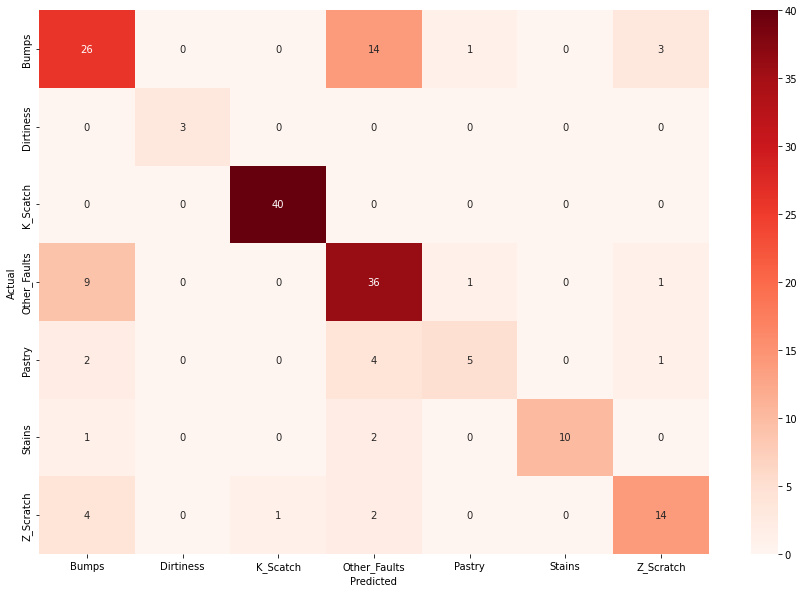

In [29]:
#Plotting the confusion matrix.

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_LogReg)

print(cm)
plt.figure(figsize=(15,10))
categories = np.unique(y)
df_cm = pd.DataFrame(cm, index = [i for i in categories], columns = [i for i in categories])
sns.heatmap(df_cm,annot=True,cmap='Reds')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [30]:
from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier()

DTC.fit(X_train, y_train)

y_pred_DTC = DTC.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred_DTC))
print(confusion_matrix(y_test, y_pred_DTC))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred_DTC,y_test))

              precision    recall  f1-score   support

       Bumps       0.69      0.66      0.67        44
   Dirtiness       1.00      0.67      0.80         3
    K_Scatch       0.93      1.00      0.96        40
Other_Faults       0.65      0.66      0.65        47
      Pastry       0.45      0.42      0.43        12
      Stains       0.92      0.85      0.88        13
   Z_Scratch       0.86      0.90      0.88        21

    accuracy                           0.76       180
   macro avg       0.79      0.74      0.76       180
weighted avg       0.76      0.76      0.76       180

[[29  0  0 10  3  0  2]
 [ 0  2  0  0  1  0  0]
 [ 0  0 40  0  0  0  0]
 [10  0  2 31  2  1  1]
 [ 2  0  0  5  5  0  0]
 [ 1  0  0  1  0 11  0]
 [ 0  0  1  1  0  0 19]]
accuracy is 0.7611111111111111


[[29  0  0 10  3  0  2]
 [ 0  2  0  0  1  0  0]
 [ 0  0 40  0  0  0  0]
 [10  0  2 31  2  1  1]
 [ 2  0  0  5  5  0  0]
 [ 1  0  0  1  0 11  0]
 [ 0  0  1  1  0  0 19]]


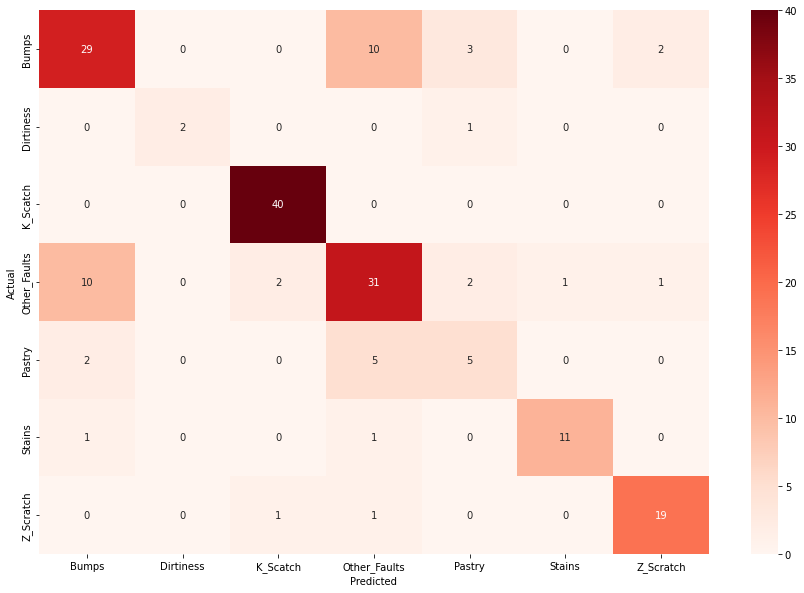

In [31]:
#Plotting the confusion matrix.

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_DTC)

print(cm)
plt.figure(figsize=(15,10))
categories = np.unique(y)
df_cm = pd.DataFrame(cm, index = [i for i in categories], columns = [i for i in categories])
sns.heatmap(df_cm,annot=True,cmap='Reds')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [32]:
# Support Vector Machine's 
from sklearn.svm import SVC

SVM_C = SVC(kernel='linear')
SVM_C.fit(X_train, y_train)

y_pred_svm = SVM_C.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred_svm,y_test))

              precision    recall  f1-score   support

       Bumps       0.60      0.61      0.61        44
   Dirtiness       1.00      1.00      1.00         3
    K_Scatch       0.98      1.00      0.99        40
Other_Faults       0.63      0.72      0.67        47
      Pastry       0.71      0.42      0.53        12
      Stains       1.00      0.85      0.92        13
   Z_Scratch       0.74      0.67      0.70        21

    accuracy                           0.74       180
   macro avg       0.81      0.75      0.77       180
weighted avg       0.75      0.74      0.74       180

[[27  0  0 13  1  0  3]
 [ 0  3  0  0  0  0  0]
 [ 0  0 40  0  0  0  0]
 [11  0  0 34  1  0  1]
 [ 2  0  0  4  5  0  1]
 [ 1  0  0  1  0 11  0]
 [ 4  0  1  2  0  0 14]]
accuracy is 0.7444444444444445


[[27  0  0 13  1  0  3]
 [ 0  3  0  0  0  0  0]
 [ 0  0 40  0  0  0  0]
 [11  0  0 34  1  0  1]
 [ 2  0  0  4  5  0  1]
 [ 1  0  0  1  0 11  0]
 [ 4  0  1  2  0  0 14]]


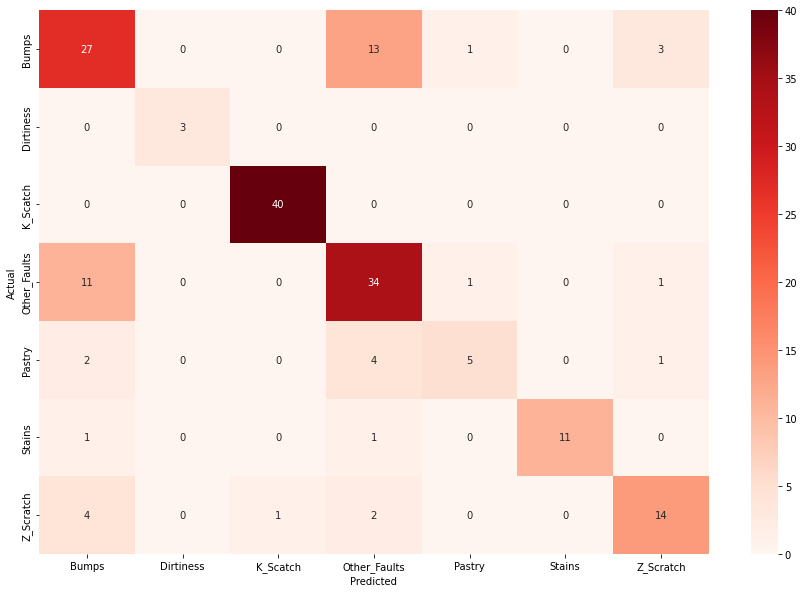

In [33]:
#Plotting the confusion matrix.

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_svm)

print(cm)
plt.figure(figsize=(15,10))
categories = np.unique(y)
df_cm = pd.DataFrame(cm, index = [i for i in categories], columns = [i for i in categories])
sns.heatmap(df_cm,annot=True,cmap='Reds')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [34]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=30, random_state=68, max_depth = 10)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
y_pred_train = rfc.predict(X_train)
print('The training accuracy of the model is {}'.format(accuracy_score(y_train,y_pred_train)))
print('The testing accuracy of the model is {}'.format(accuracy_score(y_test,y_pred_rfc)))

The training accuracy of the model is 0.943104514533086
The testing accuracy of the model is 0.7944444444444444


[[31  0  0 12  1  0  0]
 [ 0  3  0  0  0  0  0]
 [ 0  0 40  0  0  0  0]
 [ 9  0  0 38  0  0  0]
 [ 2  0  0  3  6  0  1]
 [ 1  0  0  1  0 11  0]
 [ 2  0  0  5  0  0 14]]


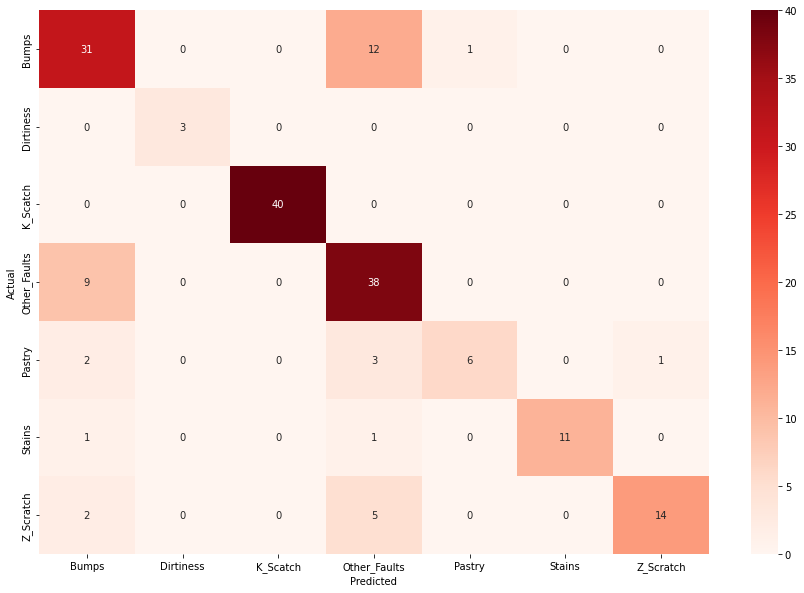

In [35]:
#Plotting the confusion matrix.

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_rfc)

print(cm)
plt.figure(figsize=(15,10))
categories = np.unique(y)
df_cm = pd.DataFrame(cm, index = [i for i in categories], columns = [i for i in categories])
sns.heatmap(df_cm,annot=True,cmap='Reds')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


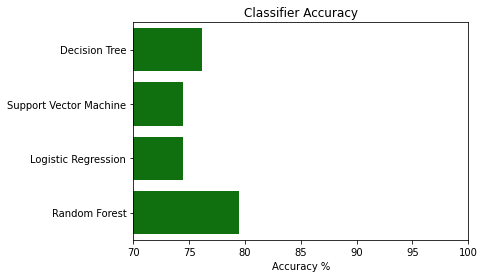

In [36]:
acc=[accuracy_score(y_pred_DTC,y_test),accuracy_score(y_pred_svm,y_test),accuracy_score(y_pred_LogReg,y_test),accuracy_score(y_pred_rfc,y_test)]
models = ['Decision Tree','Support Vector Machine','Logistic Regression','Random Forest']
acc_ = np.array(acc)*100
sns.barplot(acc_, models, color="g")
plt.xlim([70,100])
plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

In [37]:
y_rfc = rfc.predict(X_std)

print('accuracy is {:.2f}%'.format(accuracy_score(y_rfc,y)*100))



accuracy is 92.82%


In [38]:
submission = pd.DataFrame({
        
        "Result": y_rfc
    })
submission.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
